# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="a224f174e8ec45deaee9d0dc869d4662")


In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_news

{'status': 'ok',
 'totalResults': 8624,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'David Murphy',
   'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
   'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
   'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
   'publishedAt': '2021-03-31T14:00:00Z',
   'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news

{'status': 'ok',
 'totalResults': 2729,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Adi Robertson',
   'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
   'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
   'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
   'publishedAt': '2021-03-15T22:25:02Z',
   'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping b

In [6]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            text = article["content"]
            articles.append({
                "text": text,
            })
        except AttributeError:
            pass
    return pd.DataFrame(articles)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(bitcoin_news["articles"], "en")
# Sentiment scores dictionaries
btc_text = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}
# Get sentiment for the text 
for index, row in btc_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        btc_text["Compound"].append(text_sentiment["compound"])
        btc_text["Negative"].append(text_sentiment["neg"])
        btc_text["Neutral"].append(text_sentiment["neu"])
        btc_text["Positive"].append(text_sentiment["pos"])
    except AttributeError:
        pass
btc_sentiment_df = pd.DataFrame.from_dict(btc_text, orient='columns')
btc_sentiment_df = btc_sentiment_df.join(btc_df)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_df = create_df(ethereum_news["articles"], "en")
# Sentiment scores dictionaries
eth_text = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}
# Get sentiment for the text 
for index, row in eth_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        eth_text["Compound"].append(text_sentiment["compound"])
        eth_text["Negative"].append(text_sentiment["neg"])
        eth_text["Neutral"].append(text_sentiment["neu"])
        eth_text["Positive"].append(text_sentiment["pos"])
    except AttributeError:
        pass
eth_sentiment_df = pd.DataFrame.from_dict(eth_text, orient='columns')
eth_sentiment_df = eth_sentiment_df.join(eth_df)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5574,0.11,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.00,0.961,0.039,Whether youre looking to make a larger investm...
2,0.0000,0.00,1.000,0.000,Famed auction house Christies just sold its fi...
3,0.0000,0.00,1.000,0.000,Payment card network Visa has announced that t...
4,0.2732,0.00,0.938,0.062,"ConsenSys, a key player in crypto and a major ..."


In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.236610,0.028250,0.891400,0.080350
std,0.373060,0.047327,0.079059,0.066469
min,-0.557400,0.000000,0.709000,0.000000
25%,0.038700,0.000000,0.863250,0.047250
50%,0.318200,0.000000,0.911000,0.066500
75%,0.432825,0.054500,0.936250,0.103750
max,0.771700,0.142000,1.000000,0.240000


In [10]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.023990,0.033500,0.93000,0.036550
std,0.294225,0.041179,0.07114,0.049016
min,-0.557400,0.000000,0.73500,0.000000
25%,-0.115300,0.000000,0.91475,0.000000
50%,0.000000,0.000000,0.93700,0.000000
75%,0.126200,0.071000,1.00000,0.065000
max,0.565000,0.110000,1.00000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin has a higher compound score 

Q. Which coin had the highest positive score?

A: Bitcoin has the higher positive score 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
sw_addons = {"ab", "char", "fe", "h", "th", "pa", "r", "fd", "u", 'ru'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Convert the words to lowercase, removing punctuation and stopwords
    words = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens


In [36]:
# Create a new tokens column for bitcoin
btc_tokens = [tokenizer(text) for text in btc_sentiment_df["text"]]
btc_sentiment_df["tokens"] = btc_tokens
# btc_tokens
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."


In [37]:
# Create a new tokens column for ethereum
eth_tokens = [tokenizer(text) for text in eth_sentiment_df["text"]]
eth_sentiment_df["tokens"] = eth_tokens
# eth_tokens
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.5574,0.11,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,0.0772,0.00,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
2,0.0000,0.00,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christie, sold, first,..."
3,0.0000,0.00,1.000,0.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, announced, tran..."
4,0.2732,0.00,0.938,0.062,"ConsenSys, a key player in crypto and a major ...","[consensys, key, player, crypto, major, propon..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_token_list = []
for token in btc_tokens:
    btc_token_list.extend(token)

btc_ngrams = Counter(ngrams(btc_token_list, n=2))
btc_ngrams

Counter({('whether', 'youre'): 1,
         ('youre', 'looking'): 1,
         ('looking', 'make'): 1,
         ('make', 'larger'): 1,
         ('larger', 'investment'): 1,
         ('investment', 'want'): 1,
         ('want', 'dabble'): 1,
         ('dabble', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'purchase'): 1,
         ('purchase', 'bitcoin'): 1,
         ('bitcoin', 'ethereum'): 1,
         ('ethereum', 'bitcoin'): 1,
         ('bitcoin', 'cash'): 1,
         ('cash', 'litecoin'): 1,
         ('litecoin', 'paypal'): 1,
         ('paypal', 'soon'): 1,
         ('soon', 'youll'): 1,
         ('youll', 'char'): 1,
         ('char', 'promised'): 1,
         ('promised', 'earlier'): 1,
         ('earlier', 'year'): 2,
         ('year', 'tesla'): 1,
         ('tesla', 'accepts'): 1,
         ('accepts', 'payment'): 1,
         ('payment', 'bitcoin'): 1,
         ('bitcoin', 'according'): 1,
         ('according', 'tesla'): 2,
         ('tesla', 'website'): 1,
         ('web

In [18]:
# Generate the Ethereum N-grams where N=2
eth_token_list = []
for token in eth_tokens:
    eth_token_list.extend(token)
    
eth_ngrams = Counter(ngrams(eth_token_list, n=2))
eth_ngrams

Counter({('one', 'strictest'): 1,
         ('strictest', 'crackdown'): 1,
         ('crackdown', 'worldwidephoto'): 1,
         ('worldwidephoto', 'michele'): 1,
         ('michele', 'doying'): 1,
         ('doying', 'vergeindia'): 1,
         ('vergeindia', 'reportedly'): 1,
         ('reportedly', 'moving'): 1,
         ('moving', 'forward'): 1,
         ('forward', 'sweeping'): 1,
         ('sweeping', 'ban'): 1,
         ('ban', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'according'): 1,
         ('according', 'reuters'): 1,
         ('reuters', 'country'): 1,
         ('country', 'legislat'): 1,
         ('legislat', 'char'): 1,
         ('char', 'whether'): 1,
         ('whether', 'youre'): 1,
         ('youre', 'looking'): 1,
         ('looking', 'make'): 1,
         ('make', 'larger'): 1,
         ('larger', 'investment'): 1,
         ('investment', 'want'): 1,
         ('want', 'dabble'): 1,
         ('dabble', 'cryptocurrencies'): 1,
         ('cryptocurrencies', '

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
token_count(btc_token_list)

[('char', 20),
 ('bitcoin', 17),
 ('tesla', 7),
 ('reuters', 7),
 ('year', 6),
 ('according', 5),
 ('cryptocurrencies', 4),
 ('crypto', 4),
 ('paypal', 3),
 ('musk', 3)]

In [21]:
# Get the top 10 words for Ethereum
token_count(eth_token_list)

[('char', 19),
 ('ethereum', 5),
 ('new', 5),
 ('nft', 5),
 ('digital', 4),
 ('blockchain', 4),
 ('cryptocurrency', 4),
 ('one', 3),
 ('cryptocurrencies', 3),
 ('country', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

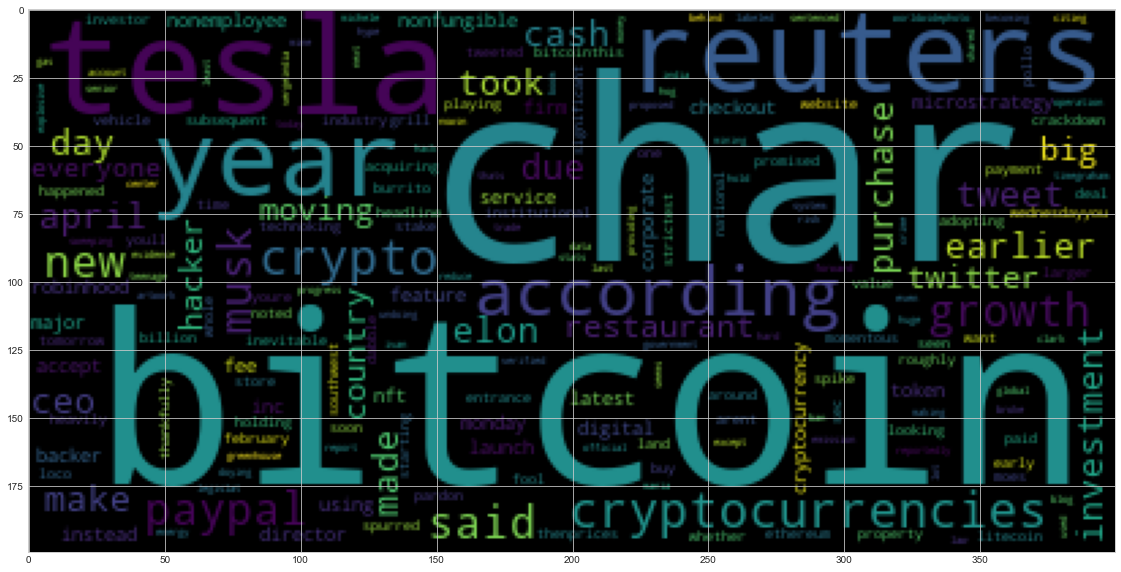

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud()
btc_img = wc.generate(' '.join(btc_token_list))
plt.imshow(btc_img)

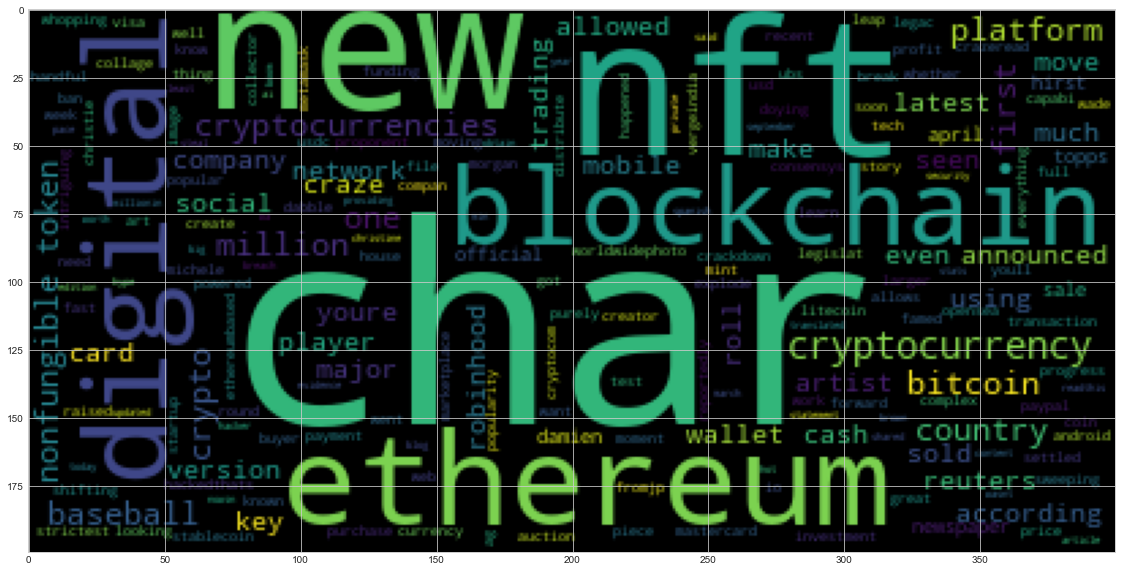

In [24]:
# Generate the Ethereum word cloud
eth_img = wc.generate(' '.join(eth_token_list))
plt.imshow(eth_img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
all_btc_text = ' '.join(btc_sentiment_df["text"])
all_btc_text

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake 

In [29]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [31]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
a momentous year DATE
2020 DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
National Burrito Day EVENT
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
this morning TIME
millions CARDINAL
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
The Wise Origin Bitcoin ETF WORK_OF_ART
the United States GPE
FD Funds Management LLC ORG
PayPal PERSON
Julian Satterthwaite PERSON
Reuters ORG
LONDON GP

---

## Ethereum NER

In [32]:
# Concatenate all of the ethereum text together
all_eth_text = ' '.join(eth_sentiment_df["text"])
all_eth_text

"One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars] ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)
# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [35]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Ethereum ORG
NFT ORG
NFT ORG
recent weeks DATE
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
26, 2021 DATE
Spanish NORP
AI ORG
New York Times ORG
daily DATE
Topps GPE
first ORDINAL
NFT ORG
36.32 MONEY
April 3 DATE
90% PERCENT
as much as 8% PERCENT
Tuesday DATE
Coinbase ORG
Berlin GPE
April 14 DATE
Last month DATE
hours TIME
Beeple’s ORG
$69 million MONEY
NFT ORG
24 CARDINAL
24 CARDINAL
MLB ORG
NFT ORG
Major League Baseball ORG
NFT ORG
Topps GPE
India GPE
Reuters ORG
Damien Hirst PERSON
Chris Young PERSON
Superstar PERSON
Damien Hirst PERSON